<center>
    <img width="20%" src="https://emprelatam.com/wp-content/uploads/2019/10/logos-coderhouse-01.png">
</center>

# **Segunda pre entrega del proyecto final**


Contenido


1.   Abstract
3.   **Carga de datos por API Yahoo y limpieza de datos**
2.   Preguntas de interes sobre el DataSet que se buscan resolver
3.   Definicion de objetivos y  Contexto comercial y Problema comercial
4.   Analisis Exploratorio de Datos DEA - Analisis tabular
5.   Regresión lineal

#### **Entregado por Steven Vargas**



  ## 1.   **Abstract**

El mundo de las finanzas es complejo, a la hora de invertir, no siempre se cuenta con las mejores herramientas de estimación del precio de las acciones, dadas la naturaleza de estas y en muchos casos la volatilidad con el tiempo, su valor en el mercado o su valor futuro. Un ejemplo de esto, es que desde inicios del siglo XX se han construido herramientas que faciliten la decisión de comprar acciones, conociendo principios como: su % esperado en un intervalo de tiempo específico, sus riesgos, la posibilidad de recompra, re venta, entre otros. Es por ello que, en el presente trabajo, se busca la construcción de un portafolio de inversión dinámico, que permita pronosticar el precio de las acciones que se carguen, así como lo que se espera que ocurra con ellas en un horizonte de tiempo definido. El data Set seleccionado para este fin, cuenta con información de: “fecha” que la fecha histórica de la acción; “Symbol” que es el diminutivo de la acción seleccionada. “Open” precio de apertura de la acción; “close” precio con el que cierra, “Low” el precio mas bajo que registro; “high” precio más bajo que tuvo durante el día; y “Volumen” que es la cantidad de un activo concreto en el que se invierte durante un período de tiempo determinado.


El Data Set cuenta con las siguientes características:

 

*   851.264 registros históricos, que tiene fechas del 01 de enero de 2020 al 30 de diciembre del 2020 ,por medio de la **API** de finanzas de **Yfinance**. 
*   El Data Set cuenta con 501 acciones diferentes, registrados en el mercado de la bolsa de New York. 
*  Se propone la seleccion de 4 acciones del mercado cualquiera, y una 5ta que es la comparación con el mercado (^GSPC)





---



# 2.   **Preguntas de interes sobre el DatSet que se buscan resolver**

> Bloc con sangría



1.   Del grupo de 501 acciones ¿Cuales son las 4 mas rentables del año 2020?¿cuales son las mejores opciones para un portafolio de inversion?
2.   ¿Como crear un portafolio de inversion automatico que clasifique las mejores acciones para invertir segun parametros?
3.   ¿Que tipo de pronostico es el mas acertado para estimar un horizonte de tiempo no mayor a 6 meses del estimado de las acciones?
4. Cuales deben ser los criterios de evaluacion de acciones volatiles. 
5. ¿se puede determinar cuando una accion va a la quiebra?
6. ¿El analisis de correciones es la mejor opcion para hacer una evaluacion 
primaria de las accciones?




---



# 3.  **Definicion de objetivos**

#### Contexto comercial y Problema comercial

El mercado de los valores es un mercado poco conocido por las personas que no tienen asociacion con el comportamiento de los datos, esto hace que un pequeño grupo de personas que tnga el conocimiento basico, pueda interpretar los datos. es por ello que se busca crear una herramienta de facil acceso y facil entendimiento, que permita que cualquier persona, con solo descargar una data con la misma estructura, pueda pronosticas acciones del mercado.




---



# 4.  **Analisis Exploratorio de Datos DEA**



Voy a dividir el análisis en los siguientes apartados:



1. El problema: Comprender el problema
2. Estudio Correlaciones
> Limpieza básica de los datos.

 > suposiciones de las correlaciones.

#### 4.1. El problema
Para entender realmente el conjunto de datos, voy a estudiar el significado y la relevancia de cada variable con respecto al problema. Intentaré responder a diversas cuestiones sobre ellas, como:

La relevancia de la variable en la compra de una casa.

1.   importancia de entender las acciones
2.   Cuales son sus variables


Las variables dentro del DataSet de la siguiente manera:

*   **Date**: Fecha del registro de las acciones del dia.
*   **Symbol**: Es el simbolo segun el indice Nasdaq.
*   **Open**: Es el precio con el que abre el mercado cada dia.
*   **Close**: Es el precio de cierre de mercado.
*   **Low**: Es el valor minimo que alcanza la accion ese dia.
*   **High**: Es el valor maximo que alcanza la accion ese dia. 
*   **Volumen**: Es la cantidad de títulos negociados (o su equivalente en dinero) de una acción en un periodo determinado



Para motivos del proyecto y del mismo comportamiento de las acciones; Debemos enfocarnos en el comportamiento de los precios de cierre de las acciones que se buscan automatizar, esto por motivos de la **correlacion de los precios de cierre** y lo que se busca en ellos, ya que el precio de cierre de la acciones e el que define los pronosticos en el mercado. Por esta razon se busca evaluar en 4 acciones diferentes las correlaciones de los precios y con el comportamiento general del mercado (^GSPC). 

#### 4.2. Análisis de correlaciones:

En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable, por lo que voy a estudiarla con mayor detenimiento:



> **Acciones a Evaluar**: 


*   Google - GOOGL
*   IBM    - IBM
*   Microsoft  - MSFT
*   Banco de america  -  BAC
*   S&P 500 (^GSPC): El S&P 500 se calcula mediante una media aritmética ponderada por capitalización y representa la mayor parte de la capitalización bursátil de los Estados Unidos.



**Los datos**: Para el uso de los datos, se popone el uso de de libreria Yfinance de Yahoo, que contiene las bases de datos de las acciones de la bolsa de NewYork en tiempo real o por periodos de tiempo preseleccionados.

  # Analisis de correlaciones y Data Wrangling

> Bloc con sangría



In [ ]:
#Instalacion yfinance de Yahoo
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


**Carga de las librerias a utilizar**

In [ ]:
# Cargar Librerias a utilizar 

from pandas.core.common import pipe
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas
import pandas_datareader as pdr
import yfinance as yfin
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [ ]:
# Listado de acciones a evaluar
Lista_Acciones = ['GOOGL','IBM','MSFT','BAC']

#Periodo de tiempo a Evaluar
start =dt.datetime(2020,1,1) 
end =dt.datetime(2020,12,31) 

# llamo los datos de las acciones alojados en Yahoo finance
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
Acciones = pdr.get_data_yahoo(Lista_Acciones,start,end)

# Segmento unicamente con los valores de cierre y creo mi DataFrame con esos datos 
Acciones = Acciones['Adj Close']


#Normalizamos los datos a evaluar, usando los retornos de bloqueo, que es el logaritmo de las acciones dividio
# en las acciones de cambio 

Log_returns = np.log(Acciones/Acciones.shift())

# Devolvemos los datos ahora con una correlacion simple 
Log_returns.corr()

[*********************100%***********************]  4 of 4 completed


,BAC,GOOGL,IBM,MSFT
BAC,1.000000,0.613857,0.757575,0.598490
GOOGL,0.613857,1.000000,0.664611,0.862056
IBM,0.757575,0.664611,1.000000,0.643844
MSFT,0.598490,0.862056,0.643844,1.000000


Con el valor de las correlaciones podemos evidenciar varias cosas interesantes

1.   **BAC** : La relación mas fuerte de esta accion, es con el comportamiento de las acciones de **IBM** 
2.   **GOOGL** :   La relación mas fuerte de esta accion, es con el comportamiento de las acciones de **MSFT**
3.   **IBM** : La relación mas fuerte de esta accion, es con el comportamiento de las acciones de **BAC**
4.   **MSFT** : La relación mas fuerte de esta accion, es con el comportamiento de las acciones de **GOOGL**

Podemos decir que hasta este punto, el protafolio mas similar de acciones en cuanto a comportamientos es elegir acciones de *GOOGL* y *MSFT* dado que tienden a parecerce probabilisticamente mas en sus comportamientos.



**Graficamente podemos ver:**

In [ ]:
def Ver_Correlaciones(Accion1, Accion2, Accion3, Accion4, Accion5):
  Acciones = pdr.get_data_yahoo([Accion1, Accion2, Accion3, Accion4, Accion5],start,end) 
  Acciones = Acciones['Adj Close']
  Acciones = Acciones/Acciones.iloc[0]
  fig, ax = plt.subplots()
  Acciones.plot(ax=ax)


In [ ]:
# "Tipo de dato para cada columna"
Tipo_de_datos = str(Acciones)
Tipo_de_datos

'                  BAC      GOOGL         IBM        MSFT\nDate                                                    \n2020-01-02  33.473259  68.433998  112.916946  156.592010\n2020-01-03  32.778259  68.075996  112.016411  154.642136\n2020-01-06  32.731289  69.890503  111.816299  155.041885\n2020-01-07  32.515274  69.755501  111.891319  153.628220\n2020-01-08  32.843994  70.251999  112.825211  156.075302\n...               ...        ...         ...         ...\n2020-12-23  28.980015  86.411499  108.729279  217.759995\n2020-12-24  28.893221  86.708000  109.422539  219.464478\n2020-12-28  29.057167  88.697998  109.536636  221.641891\n2020-12-29  28.941437  87.888000  108.641525  220.843826\n2020-12-30  28.912506  86.812500  109.115410  218.410233\n\n[252 rows x 4 columns]'

In [ ]:
Acciones.describe()

,BAC,GOOGL,IBM,MSFT
count,252.000000,252.000000,252.000000,252.000000
mean,24.985652,73.895361,106.354060,189.130012
std,3.740791,8.732823,8.513378,22.994150
min,17.089174,52.706501,79.846992,132.384583
25%,22.575879,69.832748,102.232157,170.113235
50%,23.901246,73.954998,106.302334,197.634933
75%,27.251141,78.201376,109.608028,208.754967
max,33.473259,91.248497,130.854050,227.637207


[*********************100%***********************]  5 of 5 completed


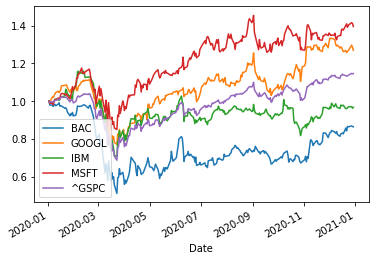

In [ ]:
  Ver_Correlaciones('GOOGL','IBM','MSFT','BAC','^GSPC')

**Analisis**

Si lo comparamos con el mercado general y el indice **^GSPC** Global Strategy for Plant Conservation (GSPC) podmeos ver como se comportaron las acciones y su relacion con el mercado global. para la toma de decisiones

Finalmente podemos afirmar que las acciones que menos afectas estuvieron con relacion al mercado global fueron la de MSFT y BAC. esto se comprueba al analizar los datos de cieres de estas



---



# 5. **Regresión lineal**




Para reducir la dimencionalidad y terne una data mas limpia, solo se tomaron **"4 acciones"** en el mismo periodo de tiempo. Adicional a esto se eligio como variable de interes los datos de **"cierre"** de estas acciones. esto se hizo para el analisis de correlaciones, pero se resumen en la siguiente linea de codigo 

In [ ]:
#Periodo de tiempo 
Lista_Acciones = ['GOOGL','IBM','MSFT','BAC','^GSPC']
start =dt.datetime(2020,1,1) 
end =dt.datetime(2020,12,31) 
Acciones = pdr.get_data_yahoo(Lista_Acciones,start,end)
Acciones = Acciones['Adj Close']
Acciones.head()

[*********************100%***********************]  5 of 5 completed


,BAC,GOOGL,IBM,MSFT,^GSPC
Date,,,,,
2020-01-02,33.473259,68.433998,112.916939,156.592026,3257.850098
2020-01-03,32.778263,68.075996,112.016403,154.642166,3234.850098
2020-01-06,32.731285,69.890503,111.816284,155.041885,3246.280029
2020-01-07,32.515263,69.755501,111.891327,153.628265,3237.179932
2020-01-08,32.843998,70.251999,112.825203,156.075287,3253.050049


Despues se propone una regresion simple para evaluar el comportamiento de las acciones en conjunto y sus relaciones entre las acciones

> Bloc con sangría




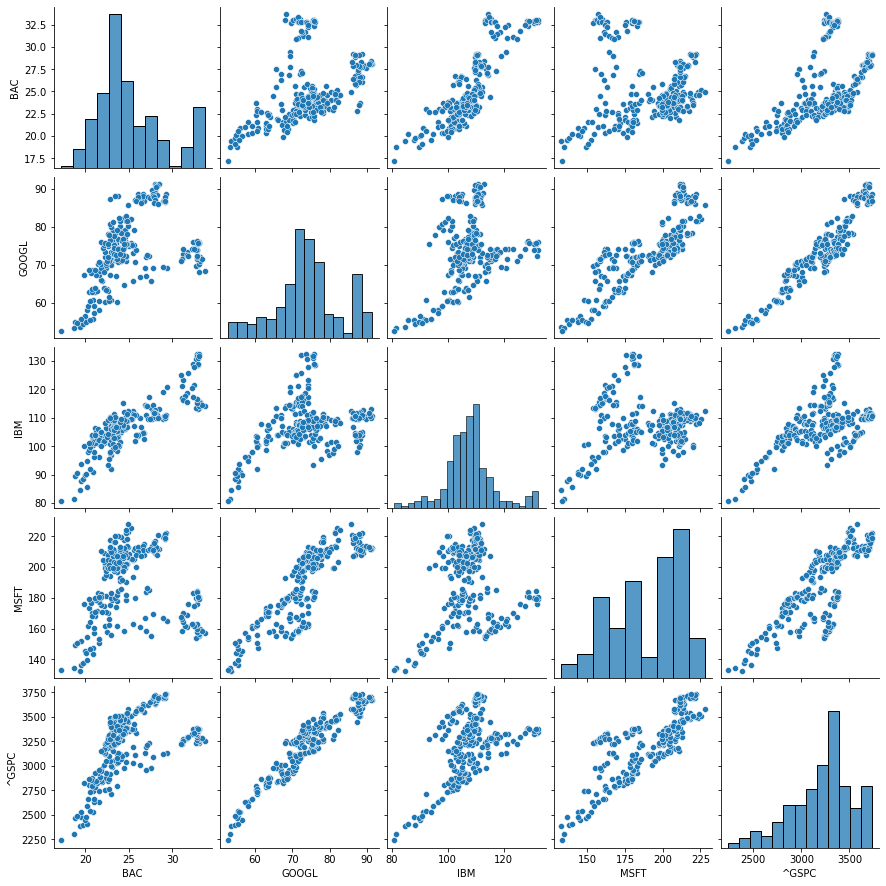

In [ ]:
g= sns.pairplot(Acciones, palette='Spectral')

# Grafico y predicción

Para los datos almacenadas tenemos lo siguiente para la regresion propuesta:



In [ ]:
## Llamo mi DataSet
Regresionx = Acciones[['BAC', 'GOOGL', 'IBM', 'MSFT']].values.reshape(-4,4)
Regresiony = Acciones.index

linear_regressor = LinearRegression()
linear_regressor.fit(Regresionx,Regresiony)
Linea_Predictiva = linear_regressor.predict(Regresionx)
Linea_Predictiva



array([1.57970700e+18, 1.57963068e+18, 1.58067159e+18, 1.58033314e+18,
       1.58065404e+18, 1.58095305e+18, 1.58109976e+18, 1.58171917e+18,
       1.58144562e+18, 1.58175903e+18, 1.58219372e+18, 1.58298634e+18,
       1.58275821e+18, 1.58112515e+18, 1.58172771e+18, 1.58179613e+18,
       1.58116985e+18, 1.58189070e+18, 1.58320344e+18, 1.58429895e+18,
       1.58121539e+18, 1.58242775e+18, 1.58167053e+18, 1.57912571e+18,
       1.58047924e+18, 1.58117143e+18, 1.58252105e+18, 1.58196843e+18,
       1.58161366e+18, 1.58160397e+18, 1.58322915e+18, 1.58363184e+18,
       1.58385340e+18, 1.58293485e+18, 1.58148348e+18, 1.57982636e+18,
       1.58031166e+18, 1.58156504e+18, 1.57974159e+18, 1.58219093e+18,
       1.58401598e+18, 1.58323070e+18, 1.58368650e+18, 1.58301116e+18,
       1.58240960e+18, 1.58224774e+18, 1.58319356e+18, 1.58253127e+18,
       1.58246771e+18, 1.58653328e+18, 1.58199942e+18, 1.58261314e+18,
       1.58195605e+18, 1.58385052e+18, 1.58362602e+18, 1.58355972e+18,
      

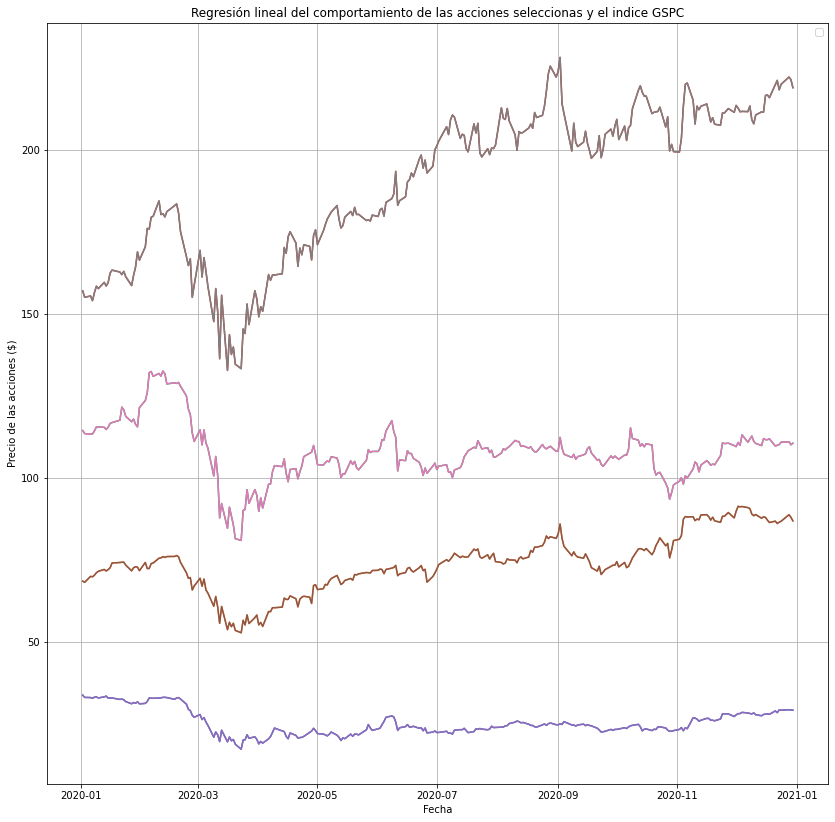

In [ ]:
fig = plt.figure(figsize=(14,14))
plt.plot(Regresiony, Acciones[['BAC', 'GOOGL', 'IBM', 'MSFT']])
plt.plot(Regresiony,Regresionx)
plt.title("Regresión lineal del comportamiento de las acciones seleccionas y el indice GSPC")
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones ($)')
plt.legend()
plt.grid()

<center>
    <img width="20%" src="https://res.cloudinary.com/hdsqazxtw/image/upload/v1579032128/coder-logo-white_t41xzb.png">
</center>
<center>
    <img width="20%" src="https://www.python.org/static/community_logos/python-logo-generic.svg">
</center>
